# Operaciones avanzadas con GeoPandas

- Creación de nuevos campos
- Colorear mapa en base a valores
- Operaciones espaciales

In [1]:
import geopandas as gpd

shape_folder = 'shapes'
shp_distritos = '/distritos censales/Distritos Censales con GSE.shp'
shp_salud = '/equipamiento de salud/Equipamiento Salud.shp'
shp_metro = '/metro/metro.shp'

distritos = gpd.read_file(shape_folder + shp_distritos)
salud = gpd.read_file(shape_folder + shp_salud)
metro = gpd.read_file(shape_folder + shp_metro)

In [2]:
distritos.head(1)

,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,Area,T_HOGARES,geometry
0,13101,Santiago,Huelén,1310101.0,18.0,688.0,651.0,1526.0,529.0,704315.75,3412,"POLYGON ((346775.511 6299463.724, 346788.392 6..."


In [3]:
salud.head(1)

,ID,COORD_X,COORD_Y,TIP_EST,DESCRIPCIO,NOMBRE,NUMERO,DIRECCION,TELEFONO,COMUNA,SSM,N_INFRA,N_EGRESO,AV_STATUS,LOCALIDAD,DIREX,CLASE,geometry
0,1,346276,6327859,C.G.R.,ESMERALDA,CARR GRAL SAN MARTIN P.42,0,CARR GRAL SAN MARTIN,0,COLINA,NORTE,2.88,0,M,ESMERALDA,CARR GRAL SAN MARTIN,CONSULTORIO GENERAL RURAL,POINT (346058.069 6327215.686)


In [5]:
metro.head(30)

,FID,M_LINEA,geometry
0,2,4A,"LINESTRING (351518.892 6289597.830, 351353.815..."
1,1,5,"MULTILINESTRING ((345655.200 6298871.574, 3464..."
2,3,4,"MULTILINESTRING ((351519.669 6289598.777, 3515..."
3,4,2,"MULTILINESTRING ((345967.302 6290392.706, 3457..."
4,5,1,"MULTILINESTRING ((340717.505 6296619.252, 3408..."


# Creación de nuevos campos
`gdf.apply()`

In [10]:
# Funcion Lambda
f = lambda x, y: x+y #-> f(x) = x + 1

In [12]:
f(23,4)

27

In [14]:
distritos['uno'] = 1
distritos['dens_E'] = distritos.apply(lambda row: row['E']/(row['Area']/10000), axis = 1) #axis=1 -> iterar por las filas // axis = 0 por la col

In [16]:
def densidad_estrato(gdf, codigo_estrato):
    gdf[f'dens_{codigo_estrato}'] = distritos.apply(lambda row: row[codigo_estrato]/(row['Area']/10000), axis = 1)
    return gdf

In [17]:
estratos = ['E', 'D', 'C3', 'C2', 'ABC1']
for ce in estratos:
    distritos = densidad_estrato(distritos, ce)

In [18]:
distritos.head(5)

,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,Area,T_HOGARES,geometry,uno,dens_E,dens_D,dens_C3,dens_C2,dens_ABC1
0,13101,Santiago,Huelén,1310101.0,18.0,688.0,651.0,1526.0,529.0,704315.75,3412,"POLYGON ((346775.511 6299463.724, 346788.392 6...",1,0.255567,9.768346,9.243014,21.666419,7.510836
1,13101,Santiago,Moneda,1310102.0,42.0,981.0,595.0,932.0,191.0,1166659.89,2741,"POLYGON ((345880.280 6299633.958, 345961.610 6...",1,0.360002,8.408620,5.100030,7.988618,1.637152
2,13101,Santiago,Amunátegui,1310103.0,35.0,599.0,515.0,951.0,287.0,509080.85,2387,"POLYGON ((345546.017 6299748.840, 345650.511 6...",1,0.687514,11.766304,10.116271,18.680726,5.637611
3,13101,Santiago,Brasil,1310104.0,77.0,1153.0,979.0,1927.0,926.0,761738.52,5062,"POLYGON ((344856.320 6298892.632, 345672.277 6...",1,1.010846,15.136428,12.852179,25.297395,12.156402
4,13101,Santiago,Chacabuco,1310105.0,90.0,1140.0,536.0,797.0,336.0,765782.74,2899,"POLYGON ((343856.526 6298225.435, 344041.982 6...",1,1.175268,14.886729,6.999374,10.407652,4.387667


# Colorear mapa en base a valores

<AxesSubplot:>

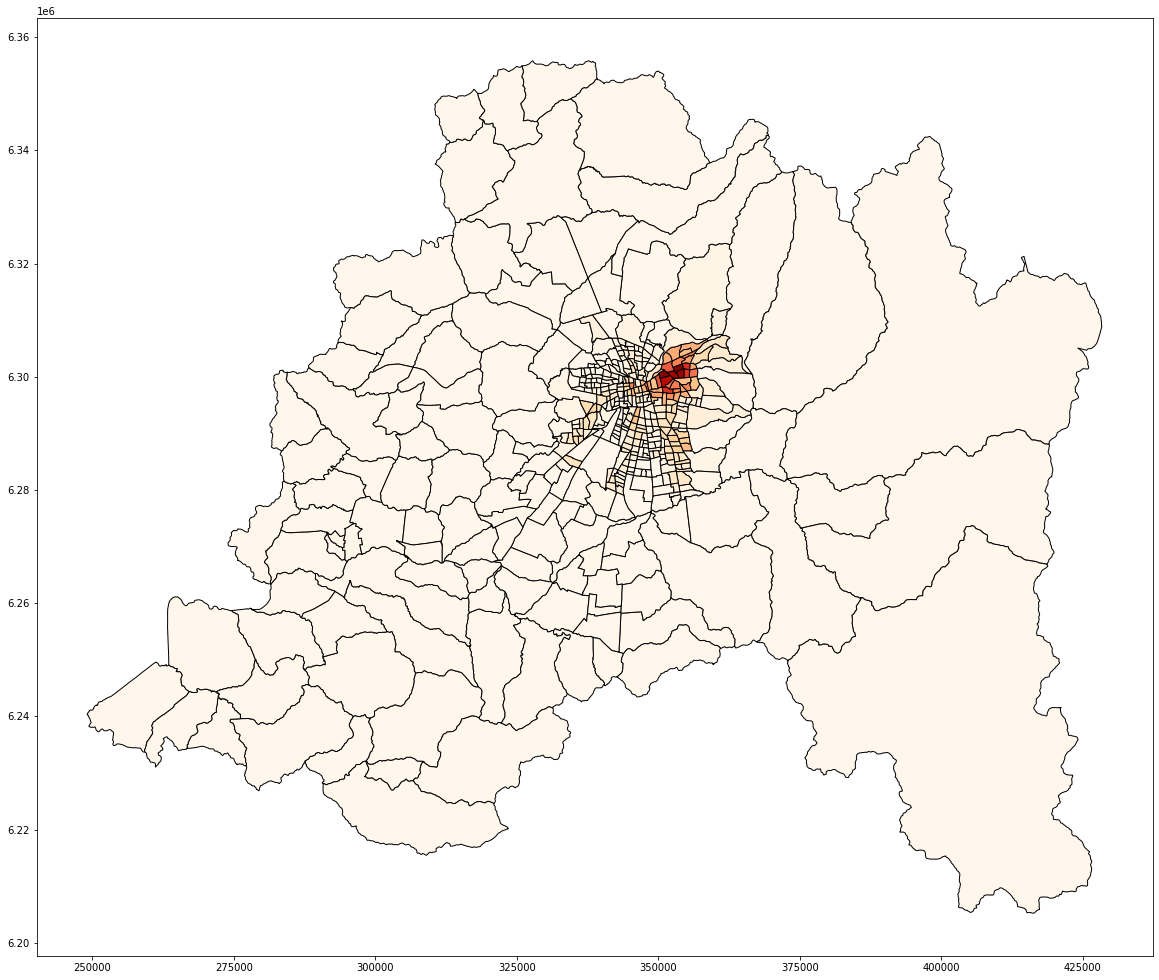

In [25]:
distritos.plot(figsize = (20,20), column = 'dens_ABC1', cmap = 'OrRd', edgecolor = '#000000')

# Operaciones espaciales
[Overlay](https://geopandas.org/set_operations.html)
[sjoin](https://geopandas.org/reference/geopandas.sjoin.html)

In [26]:
shp_urbano = '/area urbana/areas_urbanas.shp'
urbano = gpd.read_file(shape_folder + shp_urbano)

<AxesSubplot:>

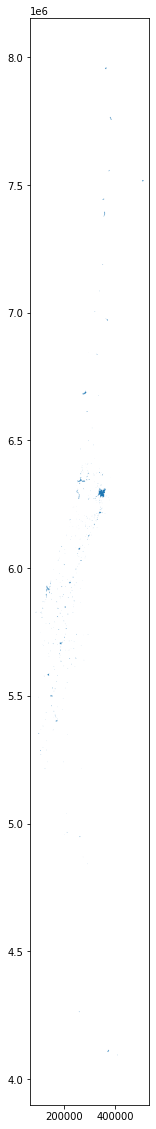

In [27]:
urbano.plot(figsize = (20,20))

In [29]:
distritos_urbanos = gpd.overlay(distritos, urbano, how = 'intersection')

<AxesSubplot:>

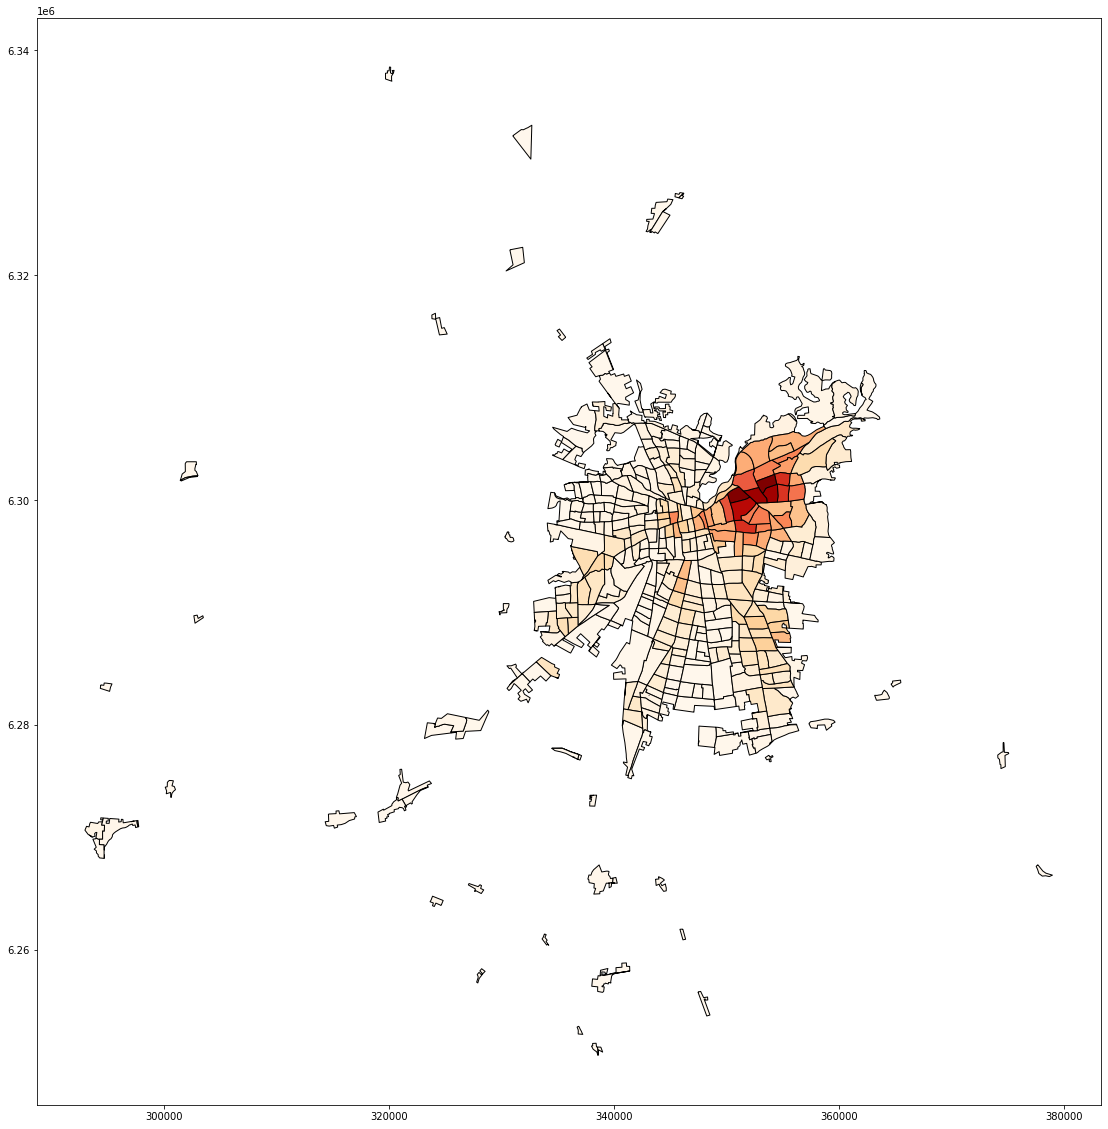

In [31]:
distritos_urbanos.plot(figsize = (20,20), column = 'dens_ABC1', cmap = 'OrRd', edgecolor = '#000000')

<AxesSubplot:>

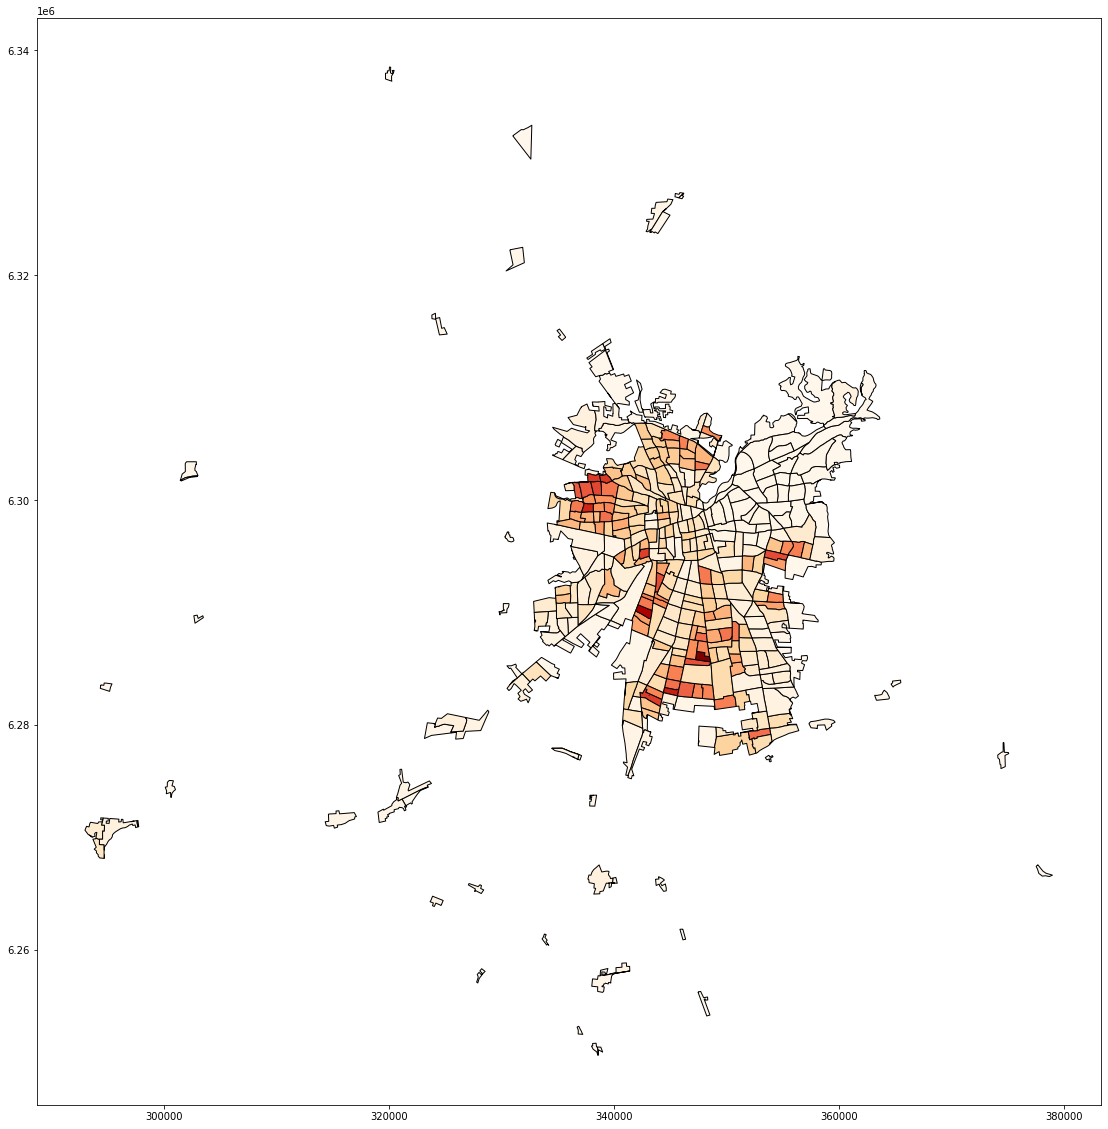

In [32]:
distritos_urbanos.plot(figsize = (20,20), column = 'dens_E', cmap = 'OrRd', edgecolor = '#000000')